# Imports

In [11]:
import os
from pathlib import Path
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

# Directory to store results

In [7]:
results_dir = Path('../../results')

results_plot = Path('../../results/plots')
results_plot.mkdir(parents=True, exist_ok=True)

# Import data

In [8]:
data = pd.DataFrame(columns=["x_axis", "Dataset", "Average Precision", "Experiments", "Model"])
datasets = {
    "mmovet15": "MMoveT15",
    "mmovet15+" :"MMoveT15+",
    "idsc_binary": "Incident\nDetection\non\nSame City",
    "iddc_binary": "Incident\nDetection\non\nDifferent City"
}
for dataset in datasets.keys():
    results_path = Path.joinpath(results_dir, dataset)    
    for i, file in enumerate(os.listdir(results_path)):
        if "Glove_Twitter_Embeddings" in file:
            data_sample = pd.read_csv(Path.joinpath(results_path, file))
            data_sample["Dataset"] = datasets[dataset]
            if "CNN" in file:
                data_sample["Model"] = "CNN"
                file = file.replace("CNN", "")
            elif "CBiGRU" in file:
                data_sample["Model"] = "C-BiGRU"
                file = file.replace("CBiGRU", "")
            else: data_sample["Model"] = "SVM"
            data_sample["Experiments"] = file.replace("_", "\n").replace(".csv","")
            data_sample["x_axis"]=i
            data = pd.concat([data, data_sample[["x_axis","Dataset", "Average Precision", "Experiments", "Model"]]])
        
data = data.astype({"Experiments":"category", "Model":"category", "x_axis": "category", "Dataset": "category", "Average Precision":"float64"})

In [9]:
grp = data.groupby(['Model', 'Dataset'])['Average Precision'].mean().sort_values().iloc[::-1]
grp_index = grp[~grp.isna()].index 
seen = set()
seen_add = seen.add
order = [x[1] for x in grp_index if not (x[1] in seen or seen_add(x[1]))][::-1]

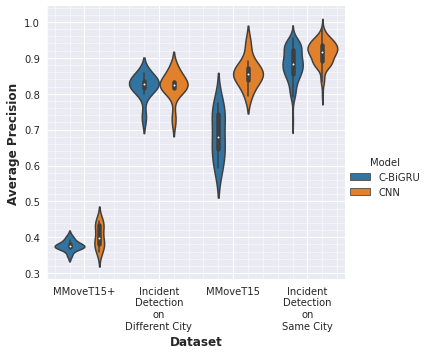

In [12]:
sns.set_style("darkgrid")
 
g = sns.catplot(x="Dataset", y="Average Precision",
               data=data, kind="violin", hue="Model", order=order)
for ax in g.axes.flat:
    ax.get_xaxis().set_minor_locator(AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(AutoMinorLocator())
    ax.grid(visible=True, which='major', color='w', linewidth=1.0)
    ax.grid(visible=True, which='minor', color='w', linewidth=0.5)

xlabel('Dataset', fontsize=12, fontweight='bold')
ylabel('Average Precision', fontsize=12, fontweight='bold')
plt.savefig(Path.joinpath(results_plot, "CNN_CBiGRU.pdf"))
plt.show()